In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.96794562902764 37.295873263991126
55.743302173983324 123.435314707783
70.87548136695438 -143.2813021568235
27.526027058731486 -10.73144415470341
85.76818331613106 -127.40566779427536
89.70707414390054 -110.63652356413402
-4.737776515436906 -161.300203387349
-40.31494483532108 94.10841187980736
22.86696273152178 3.3219224339239872
-56.134426342662955 -95.11938578189962
84.85166700550727 -111.79549230813947
-18.118513117253883 -85.54815006490016
-50.61042160853658 95.05885361808595
-70.62245810491147 -26.80075858810747
-18.268730764855007 -161.97602708577978
-45.891894437250464 -126.1152878911991
49.272590474781964 -145.17703171608918
-81.89871679351437 28.474943386962224
37.29510413420786 -5.661845092534634
-46.874538426848055 82.30138237561653
-10.097351955623608 16.383762982885372
-45.799242966518044 -177.46473827098856
27.43581353972074 135.6857228138881
-44.03384028790671 -65.35783796784362
70.88051592271259 -142.05939942912502
89.11843020340683 152.75936786516928
-24.32194489559

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | tynda
Processing Record 3 of Set 1 | fairbanks
Processing Record 4 of Set 1 | tiznit
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tessalit
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | el viso del alcor
Processing Record 18 of Set 1 | malanje
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | nichinan
Processing Record 21 of Set 1 | rawson
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | meadow lake
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | karamay
City not found. Skipping...
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | deputatskiy
Processing Record 43 of Set 4 | mildura
Processing Record 44 of Set 4 | ziro
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | severodvinsk
Processing Record 48 of Set 4 | andes
Processing Record 49 of Set 4 | zeya
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | manacapuru
Processing Record 3 of Set 5 | usinsk
Processing Record 4 of Set 5 | juegang
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | northam
Processing Record 7 of Set 5 | hilo
Processing Rec

Processing Record 29 of Set 8 | saint-joseph
Processing Record 30 of Set 8 | dekar
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | roald
Processing Record 33 of Set 8 | kerouane
Processing Record 34 of Set 8 | conde
Processing Record 35 of Set 8 | gushikawa
Processing Record 36 of Set 8 | hofn
Processing Record 37 of Set 8 | camocim
Processing Record 38 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 8 | el cano
Processing Record 40 of Set 8 | camacha
Processing Record 41 of Set 8 | honiara
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | santa rosa
Processing Record 45 of Set 8 | sandur
Processing Record 46 of Set 8 | kastamonu
Processing Record 47 of Set 8 | torbay
Processing Record 48 of Set 8 | hokitika
Processing Record 49 of Set 8 | pavlohrad
Processing Record 50 of Set 8 | ust-tsilma
Processing Record 1 of Set 9 | dakar
Processing

Processing Record 17 of Set 12 | gubkinskiy
Processing Record 18 of Set 12 | eston
Processing Record 19 of Set 12 | zhenlai
Processing Record 20 of Set 12 | placido de castro
Processing Record 21 of Set 12 | imamoglu
Processing Record 22 of Set 12 | serenje
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | afyonkarahisar
Processing Record 25 of Set 12 | chifeng
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | kununurra
Processing Record 28 of Set 12 | jining
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | toora-khem
Processing Record 31 of Set 12 | maceio
Processing Record 32 of Set 12 | chagda
City not found. Skipping...
Processing Record 33 of Set 12 | tromso
Processing Record 34 of Set 12 | saleaula
City not found. Skipping...
Processing Record 35 of Set 12 | ust-kan
Processing Record 36 of Set 12 | tidore
City not found. Skipping...
Processing Record 37 of Set 12 | bolshaya murta
City not found. Skippin

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tynda,55.1667,124.7167,28.89,79,100,12.73,RU,2022-10-16 00:33:17
1,Fairbanks,64.8378,-147.7164,33.76,69,100,8.05,US,2022-10-16 00:33:17
2,Tiznit,29.5833,-9.5000,75.49,31,100,4.16,MA,2022-10-16 00:33:18
3,Tuktoyaktuk,69.4541,-133.0374,23.00,74,75,8.05,CA,2022-10-16 00:33:19
4,Yellowknife,62.4560,-114.3525,28.92,54,40,5.75,CA,2022-10-16 00:33:19
5,Busselton,-33.6500,115.3333,58.15,65,35,9.64,AU,2022-10-16 00:33:15
6,Tessalit,20.1986,1.0114,80.42,13,0,9.19,ML,2022-10-16 00:33:20
7,Punta Arenas,-53.1500,-70.9167,46.51,53,0,17.27,CL,2022-10-16 00:32:26
8,Pisco,-13.7000,-76.2167,60.85,82,0,14.97,PE,2022-10-16 00:33:21
9,Ushuaia,-54.8000,-68.3000,44.26,49,0,12.66,AR,2022-10-16 00:33:21


In [13]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tynda,RU,2022-10-16 00:33:17,55.1667,124.7167,28.89,79,100,12.73
1,Fairbanks,US,2022-10-16 00:33:17,64.8378,-147.7164,33.76,69,100,8.05
2,Tiznit,MA,2022-10-16 00:33:18,29.5833,-9.5000,75.49,31,100,4.16
3,Tuktoyaktuk,CA,2022-10-16 00:33:19,69.4541,-133.0374,23.00,74,75,8.05
4,Yellowknife,CA,2022-10-16 00:33:19,62.4560,-114.3525,28.92,54,40,5.75
5,Busselton,AU,2022-10-16 00:33:15,-33.6500,115.3333,58.15,65,35,9.64
6,Tessalit,ML,2022-10-16 00:33:20,20.1986,1.0114,80.42,13,0,9.19
7,Punta Arenas,CL,2022-10-16 00:32:26,-53.1500,-70.9167,46.51,53,0,17.27
8,Pisco,PE,2022-10-16 00:33:21,-13.7000,-76.2167,60.85,82,0,14.97
9,Ushuaia,AR,2022-10-16 00:33:21,-54.8000,-68.3000,44.26,49,0,12.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

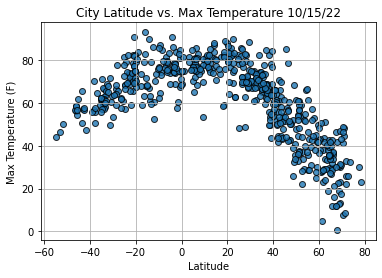

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

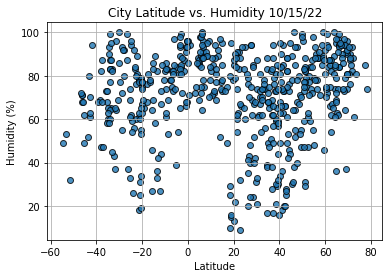

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

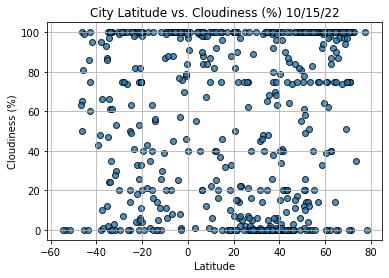

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

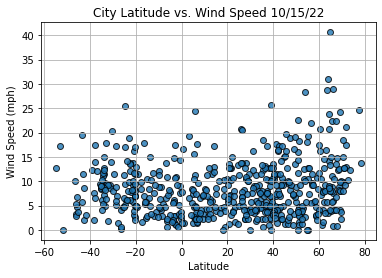

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()